In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv(r'train.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Exploration

In [7]:
# SibSp: number of siblings and spouses traveling with 
# Parch: number of parents and children traveling with 
# The embarkation : It has three possible values S,C,Q

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


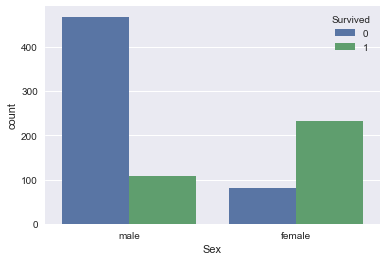

In [68]:
sns_plot=sns.countplot(x= 'Sex', hue='Survived', data=df)
sns_plot.figure.savefig("sex vs survived.png")

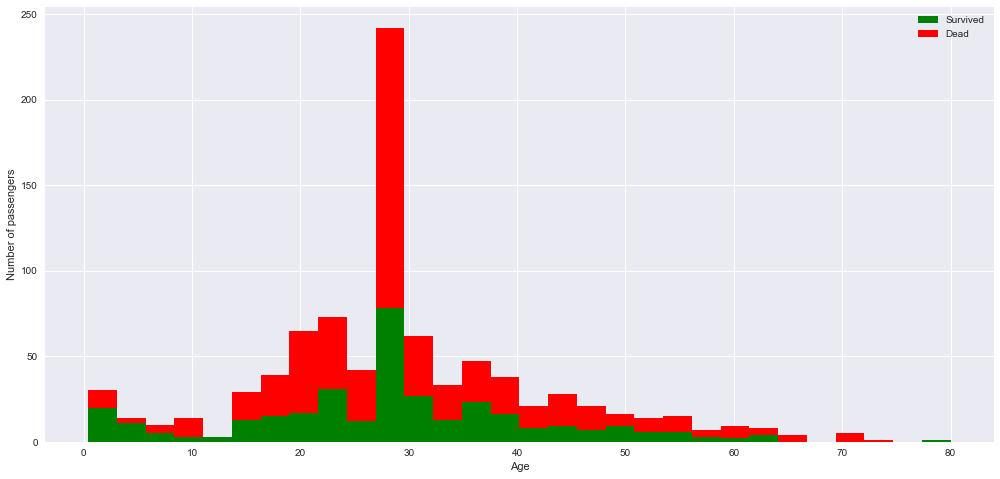

In [38]:
figure = plt.figure(figsize=(17,8))
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig("age vs survived.png")

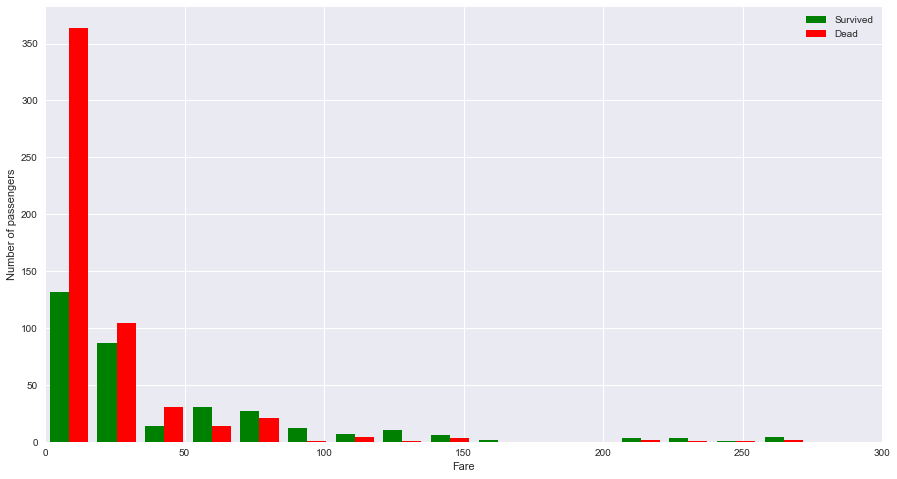

In [39]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Survived']==1]['Fare'],
          df[df['Survived']==0]['Fare']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.xlim([0,300])
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig("fare vs survived.png")
plt.show()

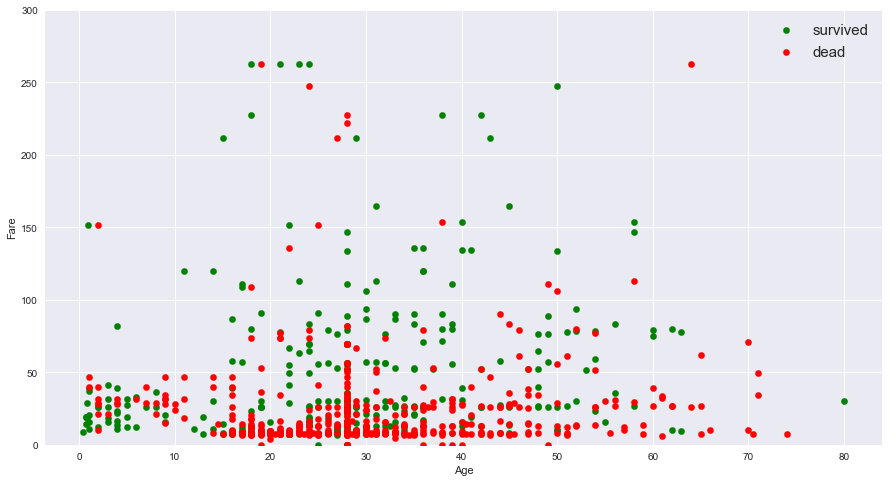

In [11]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'],df[df['Survived']==1]['Fare'], c='green',s=40)
ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Fare'], c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_ylim([0,300])
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

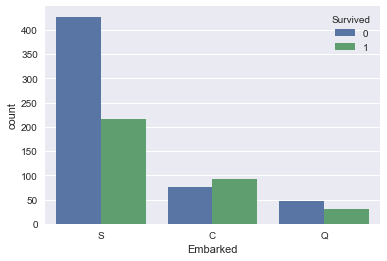

In [69]:
sns_plot2=sns.countplot(x= 'Embarked', hue='Survived', data=df)
sns_plot2.figure.savefig("embarked vs survived")

### Feature Engineering

In [14]:
train = df
test = pd.read_csv('test.csv') 
targets = train.Survived
train.drop('Survived', 1, inplace=True)
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop('index', inplace=True, axis=1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_19956/400926650.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop('Survived', 1, inplace=True)


In [15]:
# Extracting title from the names
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Lady" :      "Royalty"}
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined.Title.apply(lambda x:Title_Dictionary.get(x,x))

In [16]:
grouped_median_train = combined.iloc[:len(train)].groupby(['Sex','Pclass','Title']).median()
grouped_median_test = combined.iloc[len(train):].groupby(['Sex','Pclass','Title']).median()

In [46]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [17]:
def fillAges(row, grouped_median):
    if np.isnan(row['Age']):
        return grouped_median.loc[row['Sex'], row['Pclass'], row['Title']]['Age']
    else:
        return row['Age']

In [18]:
# Fills in the missing age in combined based on these different attributes.
combined.iloc[:len(train)]['Age'] = combined.iloc[:len(train)].apply(lambda r : fillAges(r, grouped_median_train), axis=1)
combined.iloc[len(train):]['Age'] = combined.iloc[len(train):].apply(lambda r : fillAges(r, grouped_median_test), axis=1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_19956/4009533566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.iloc[:len(train)]['Age'] = combined.iloc[:len(train)].apply(lambda r : fillAges(r, grouped_median_train), axis=1)
C:\Users\Admin\AppData\Local\Temp/ipykernel_19956/4009533566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.iloc[len(train):]['Age'] = combined.iloc[len(train):].apply(lambda r : fillAges(r, grouped_median_test), axis=1)


In [19]:
combined.drop('Name', axis=1, inplace=True)
le_title = LabelEncoder()
combined['Title'] = le_title.fit_transform(combined['Title'])

In [20]:
# Fills the fare by the mean
combined.Fare.fillna(combined.Fare.mean(), inplace=True)

# Fills the embarked by the most common
combined.Embarked.fillna('S', inplace=True)

le_embarked = LabelEncoder()
combined['Embarked'] = le_embarked.fit_transform(combined['Embarked'])

# Replacing missing cabins with U (for Uknown)
combined.Cabin.fillna('U', inplace=True)
# mapping each Cabin value with the cabin letter
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])

le_cabin = LabelEncoder()
combined['Cabin'] = le_cabin.fit_transform(combined['Cabin'])

# Encoder for Sex
le_sex = LabelEncoder()
combined['Sex'] = le_sex.fit_transform(combined['Sex'])

In [50]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = list(map(lambda t : t.strip(), ticket))
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'abc'

In [22]:
combined['Ticket'] = combined['Ticket'].apply(cleanTicket)
le_ticket = LabelEncoder()
combined['Ticket'] = le_ticket.fit_transform(combined['Ticket'])

In [23]:
# Variables around family feature
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

combined.drop('PassengerId', inplace=True, axis=1)

In [43]:
combined

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,1,22.0,1,0,2,7.2500,8,2,2,2,0,1,0
1,1,0,38.0,1,0,14,71.2833,2,0,3,2,0,1,0
2,3,0,26.0,0,0,31,7.9250,8,2,1,1,1,0,0
3,1,0,35.0,1,0,36,53.1000,2,2,3,2,0,1,0
4,3,1,35.0,0,0,36,8.0500,8,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,25.0,0,0,2,8.0500,8,2,2,1,1,0,0
1305,1,0,39.0,0,0,14,108.9000,2,0,5,1,1,0,0
1306,3,1,38.5,0,0,28,7.2500,8,2,2,1,1,0,0
1307,3,1,25.0,0,0,36,8.0500,8,2,2,1,1,0,0


### Modeling

In [57]:
from sklearn.model_selection import train_test_split
X_train = combined.head(len(train))
X_test = combined[len(train):]
y_train = df.Survived
X_train, X_test_T, y_train, y_test_T= train_test_split(X_train, y_train, random_state=1, test_size= 0.15)

In [58]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [62]:
sfm = SelectFromModel(clf, prefit=True)
train_reduced = sfm.transform(X_train)
test_reduced = sfm.transform(X_test)
train_reduced.shape, X_train.shape

((757, 4), (757, 14))

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train_reduced, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
    model = RandomForestClassifier(**parameters)
    model.fit(train_reduced, y_train)

Best score: 0.8098640641338447
Best parameters: {'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [67]:
from sklearn.metrics import classification_report
X_test_T_reduced = sfm.transform(X_test_T)
y_pred_T = model.predict(X_test_T_reduced)
print(classification_report(y_test_T,y_pred_T))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        80
           1       0.79      0.61      0.69        54

    accuracy                           0.78       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.78      0.78      0.77       134



In [32]:
output = model.predict(test_reduced).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv(r'D:\Mydownloads\test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv(r'D:\Mydownloads\output_titanic.csv',index=False)